# **Exploratory Data Analysis**

## **Import necessary libraries**

In [1]:
import os
import sys
current_dir = os.getcwd()
dir = os.path.dirname(current_dir)
sys.path.append(f"{dir}/utils")
import shutil

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image
from pathlib import Path
import glob
from tqdm.auto import tqdm
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# Set plotting styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
from helpers import *

d:\GitHub\medical-image-segmentation-and-classification\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Some constants
DATA_ROOT = f"{dir}/dataset"
CLASSES = ['COVID', 'Healthy', 'Non-COVID']

In [3]:
pastel_colors = sns.color_palette('pastel', n_colors=len(CLASSES))
reordered_colors = [pastel_colors[1], pastel_colors[2], pastel_colors[0]]

## **Dataset Overview & Statistics**

### **Overview**

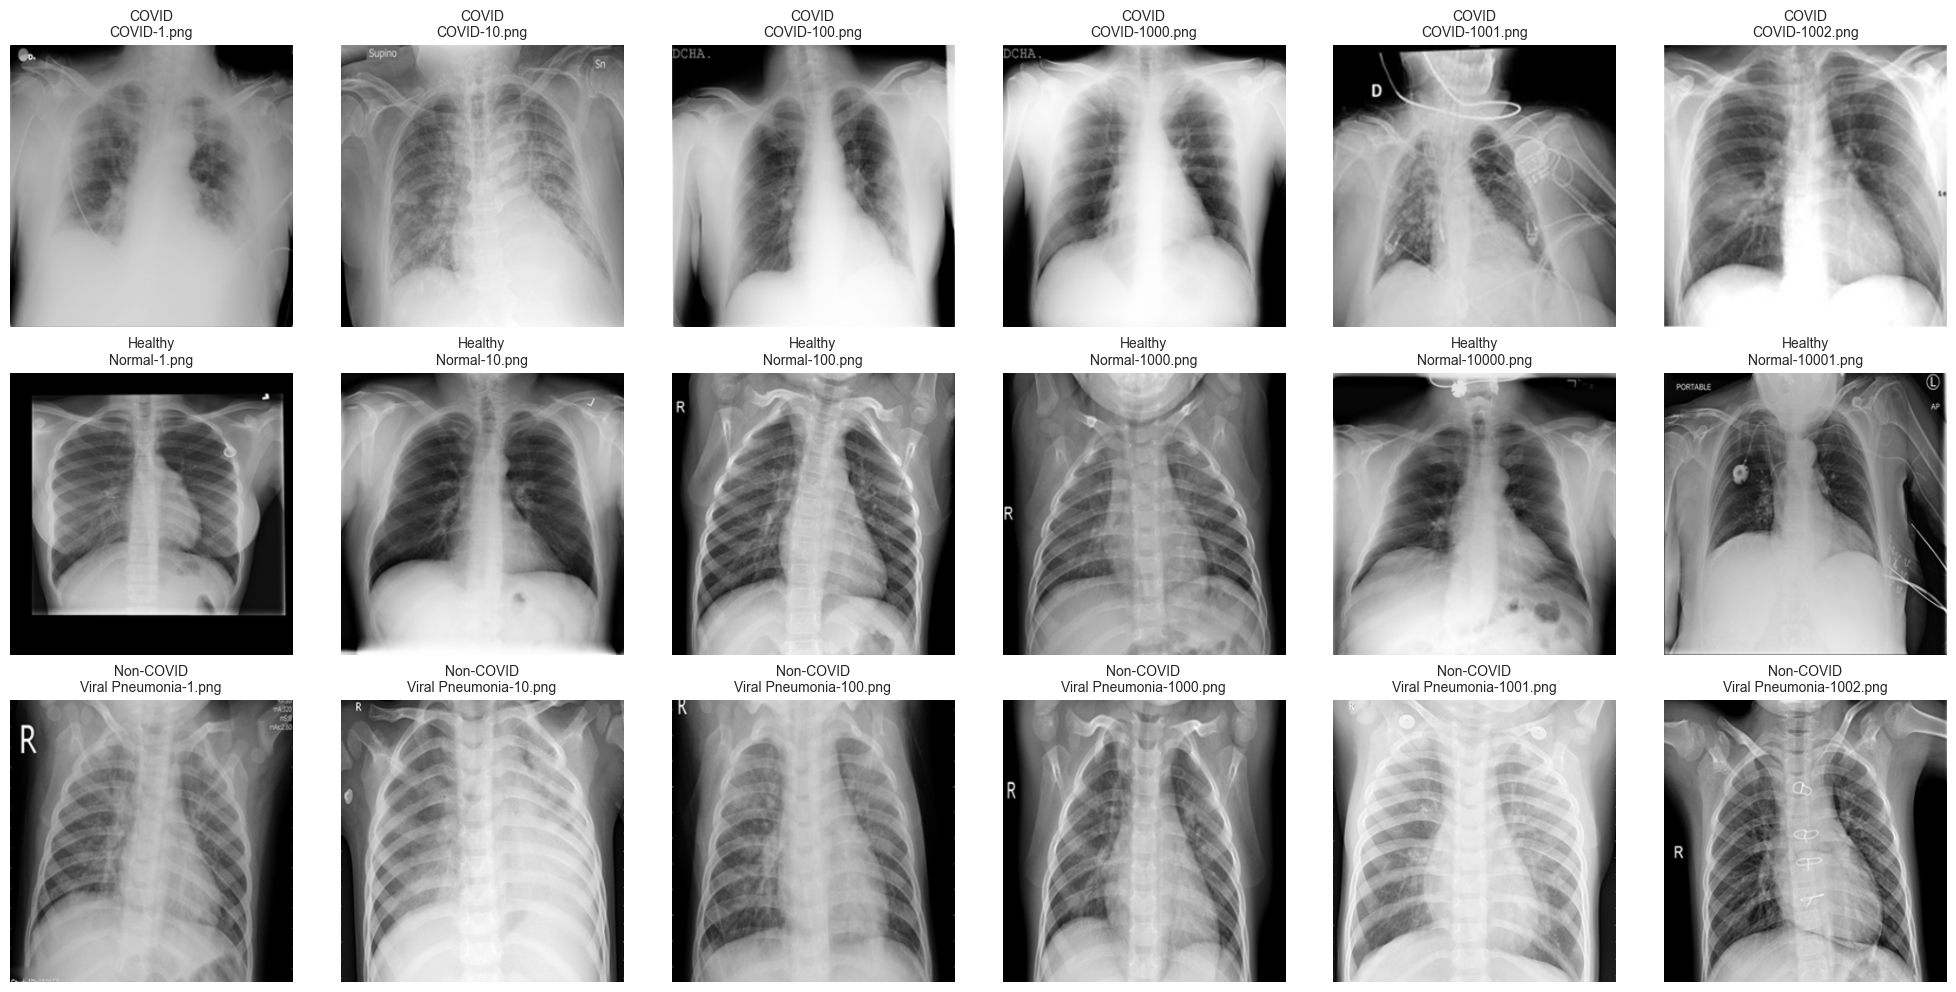

In [4]:
visualize_samples(n_samples=6, classes=CLASSES, data_root=DATA_ROOT)

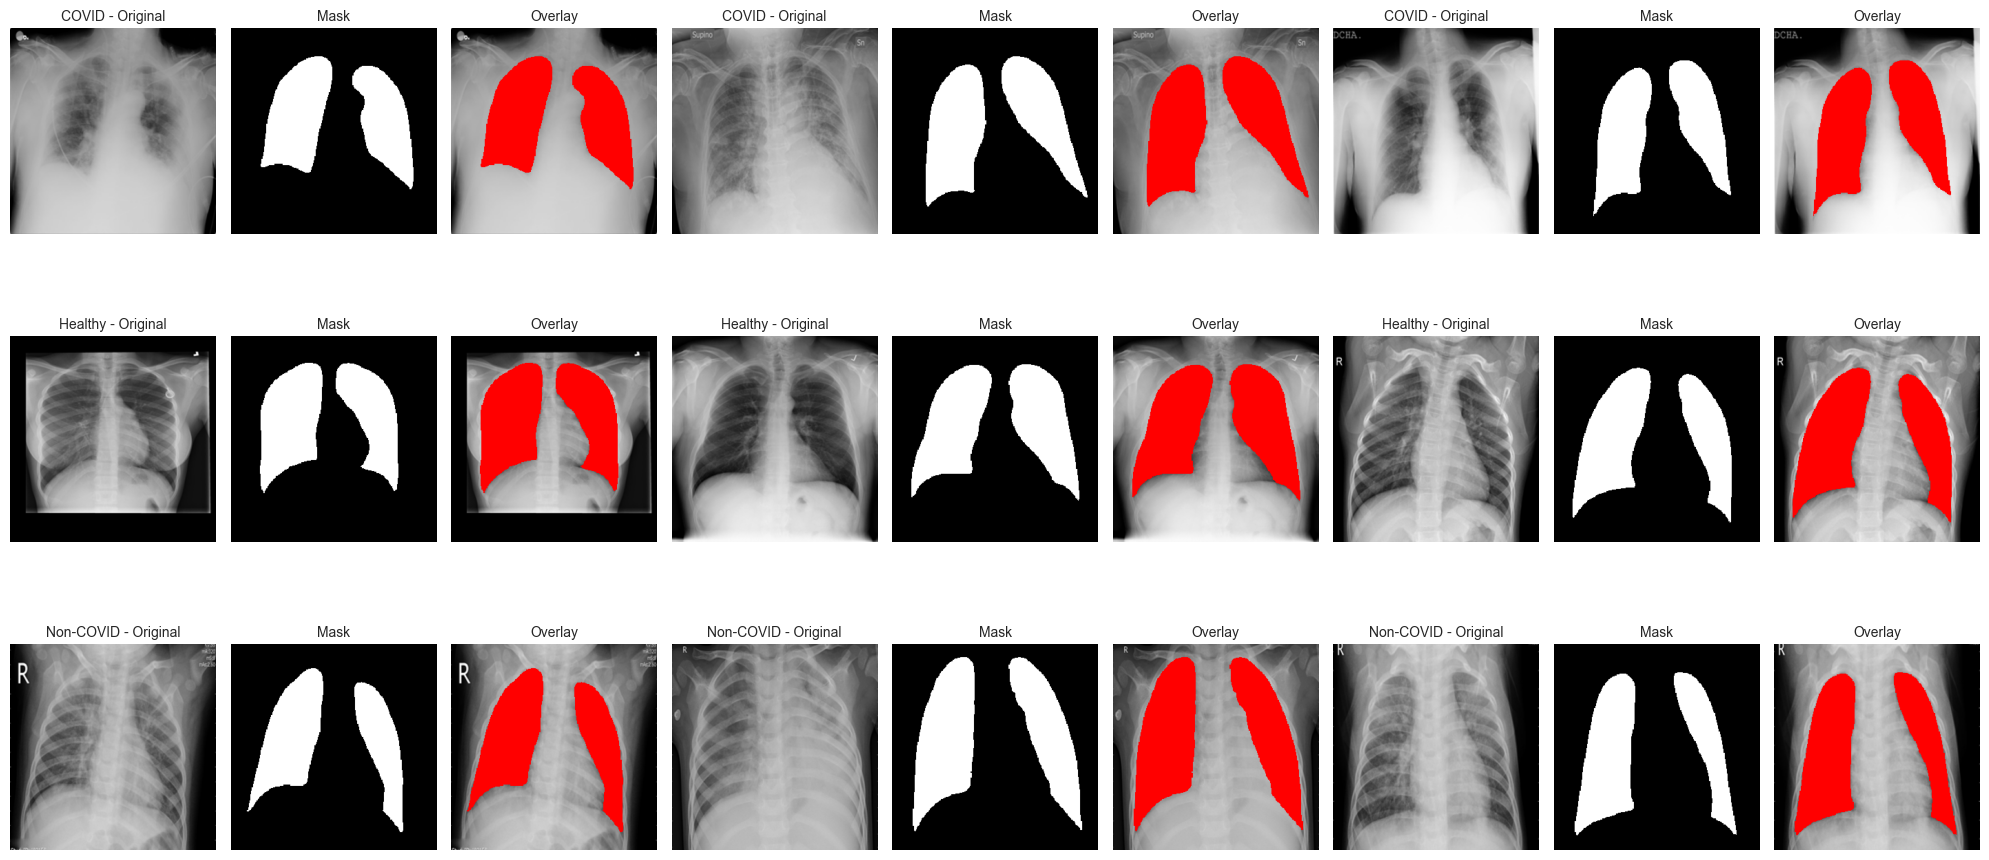

In [5]:
visualize_image_mask_pairs(n_samples=3, classes=CLASSES, data_root=DATA_ROOT)

### **Statistics**

In [6]:
stats = get_dataset_stats(data_root=DATA_ROOT, classes=CLASSES)
print("Dataset Statistics:")
for cls, data in stats.items():
    print(f"{cls}: {data['images']} images, {data['masks']} masks")

Dataset Statistics:
COVID: 3616 images, 3616 masks
Healthy: 10192 images, 10192 masks
Non-COVID: 1345 images, 1345 masks


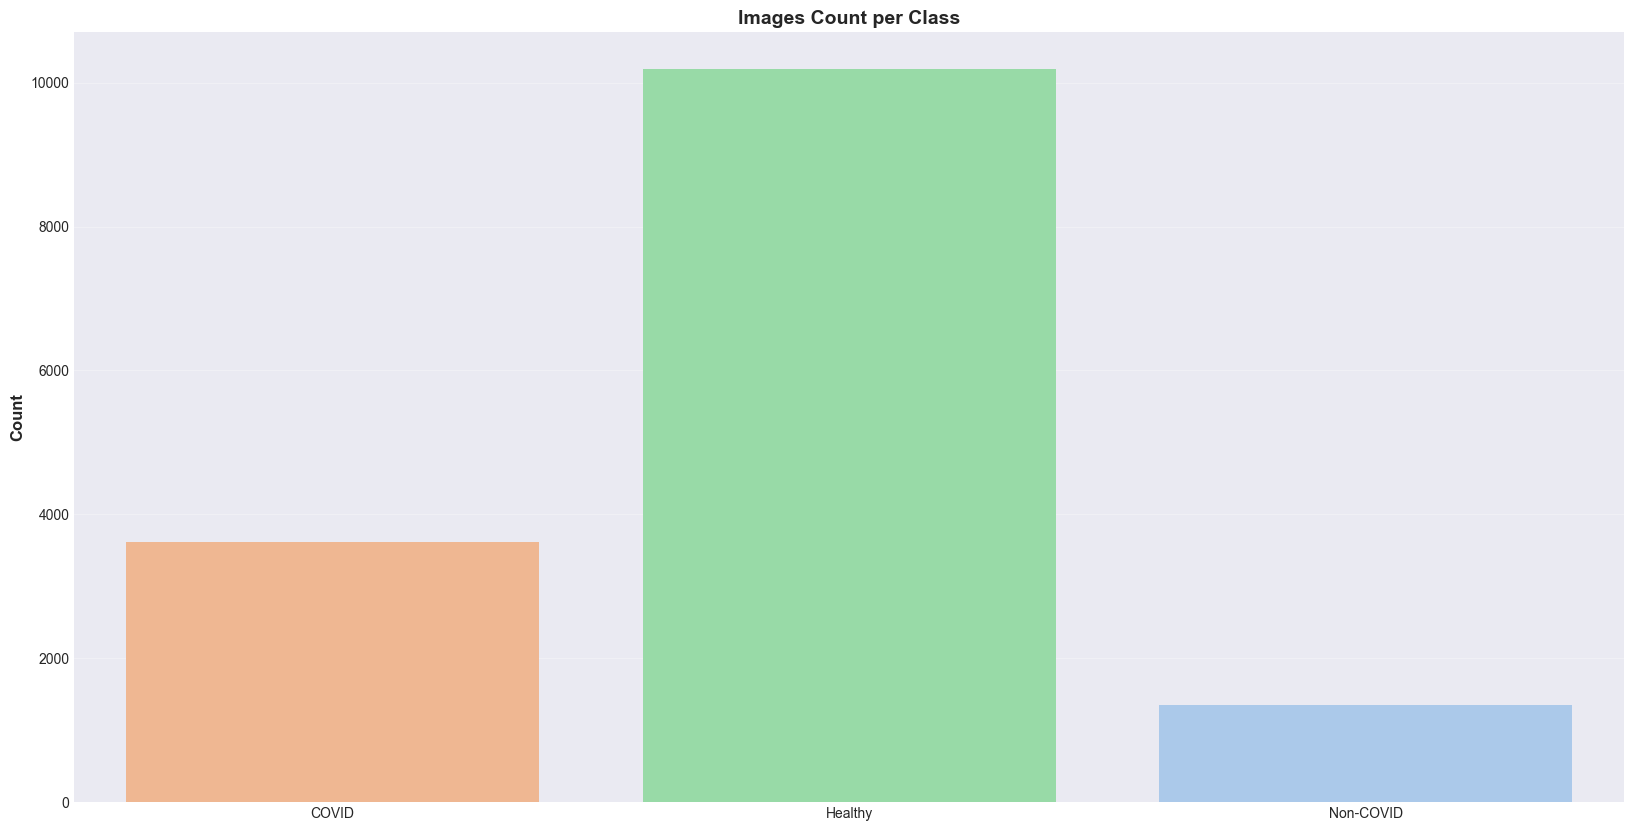

In [7]:
# Bar plot
plt.figure(figsize=(20, 10))
classes = list(stats.keys())
image_counts = [stats[cls]['images'] for cls in classes]
mask_counts = [stats[cls]['masks'] for cls in classes]

# Use seaborn with lighter pastel colors
sns.barplot(x=classes, y=image_counts, palette=reordered_colors, alpha=1)
plt.title('Images Count per Class', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

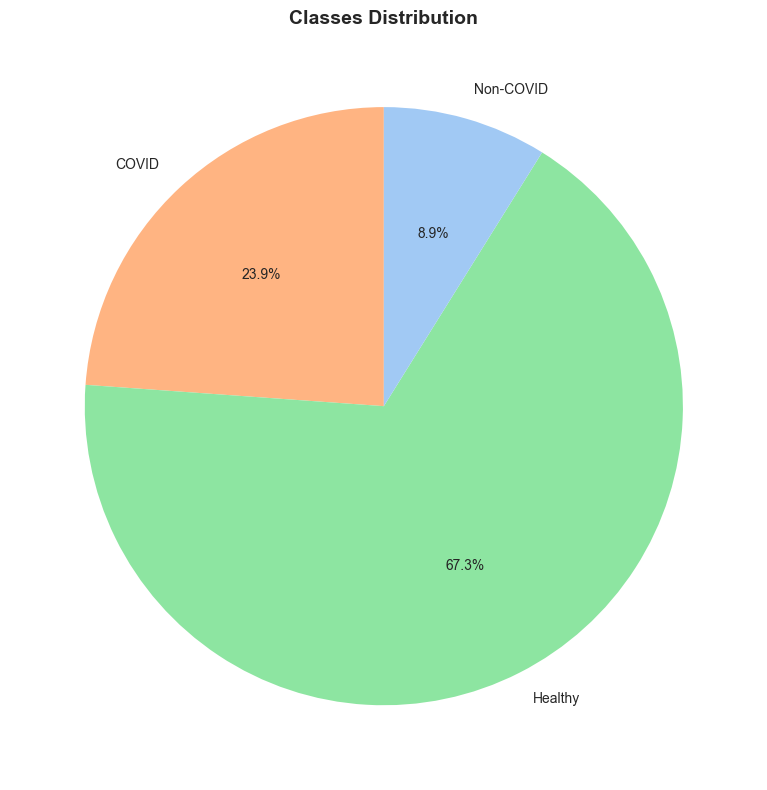

In [8]:
import seaborn as sns

# Pie chart
# Get seaborn pastel palette
plt.figure(figsize=(10, 8))
pastel_colors = sns.color_palette(reordered_colors, n_colors=len(classes))
plt.pie(image_counts, labels=classes, autopct='%1.1f%%', 
            colors=pastel_colors, startangle=90)
plt.title('Classes Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()